In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
X_digits, y_digits = load_digits(return_X_y=True)
np.shape(X_digits), np.shape(y_digits)

((1797, 64), (1797,))

<BarContainer object of 10 artists>

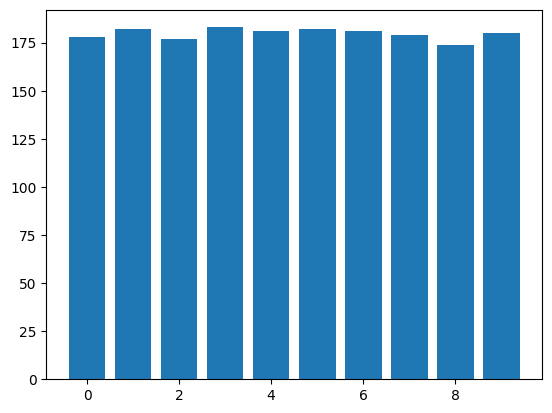

In [ ]:
plt.bar(*np.unique(y_digits, return_counts=True))

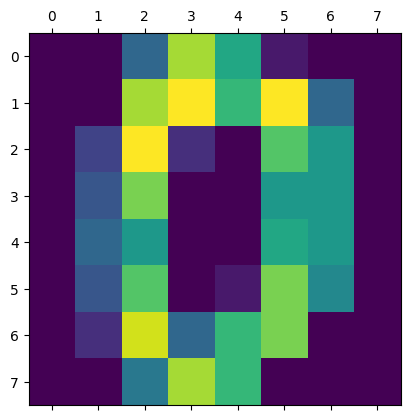

In [ ]:
plt.matshow(X_digits[0].reshape(8,8))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([5, 6, 5, 6, 5, 6, 5, 5, 5, 5]),
 53)

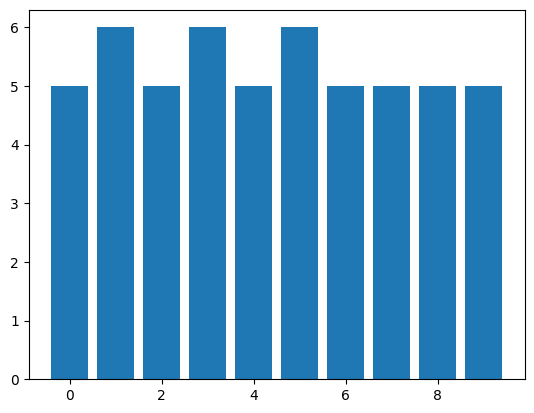

In [ ]:
# Train test split
# Test size = 0.97
# We will train only on 3% of the data
X_train_50, X_test, y_train_50, y_test = train_test_split(X_digits, 
    y_digits, test_size=0.97, random_state=42, stratify=y_digits)
plt.bar(*np.unique(y_train_50, return_counts=True))
x, f = np.unique(y_train_50, return_counts=True)
x, f, f.sum()

array([5, 5, 0, 8, 9, 3, 5, 9, 0, 8, 5, 2, 1, 6, 7, 7, 1, 0, 4, 8, 8, 7,
       6, 5, 4, 3, 5, 1, 6, 9, 7, 6, 3, 4, 2, 6, 4, 2, 3, 9, 2, 7, 0, 4,
       3, 1, 0, 2, 9, 1, 1, 8, 3])

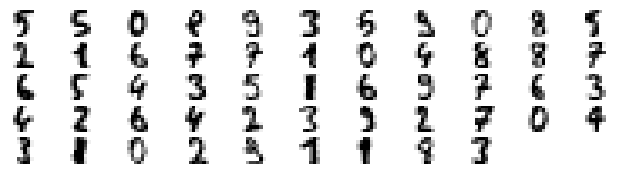

In [ ]:
pat = 53
plt.figure(figsize=(8,2))
for index, digit in enumerate(X_train_50):
    plt.subplot(pat//10, 11, index+1)
    plt.imshow(digit.reshape(8,8), cmap='binary')
    plt.axis('off')
y_train_50

In [ ]:
# Define the model and its hyper-parameters
mlp_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
# Fit the model (train, learn) with 53 patterns
mlp_model.fit(X_train_50, y_train_50)

MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)

0.7423483583750695

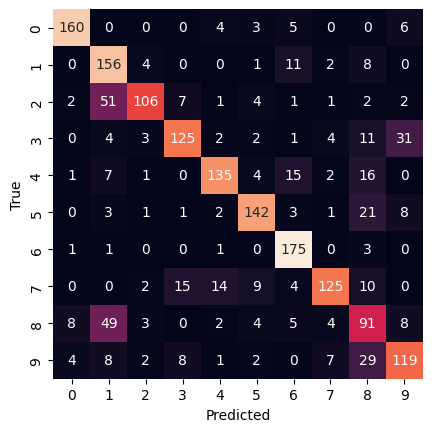

In [ ]:
# Predict for the whole dataset
y_pred = mlp_model.predict(X_digits)

# Evaluate on all dataset
cm = pd.DataFrame(confusion_matrix(y_digits, y_pred))
sns.heatmap(cm, square=True, cbar=False, fmt="d", annot=True)
plt.ylabel("True")
plt.xlabel("Predicted")
np.diag(cm).sum() / cm.sum().sum()

In [ ]:
# We will use kmeans to select our datasets
k = 53  # number of clusters
# Define the model
k_means_50 = KMeans(n_clusters=k, random_state=42)

# Fit the model
X_clusters = k_means_50.fit_transform(X_digits)
pd.DataFrame(X_clusters).head(), np.shape(X_clusters)

(          0          1          2          3          4          5   \
 0  49.731180  31.290739  43.957039  50.503593  10.841712  40.942261   
 1  28.702708  49.957961  45.161093  25.864342  56.443776  45.522756   
 2  39.133070  48.810709  45.064702  30.885436  51.063055  44.902881   
 3  44.994068  36.342783  51.329094  44.944914  45.128862  40.643576   
 4  46.206626  52.035304  52.458152  45.144416  47.282282  40.916542   
 
           6          7          8          9   ...         43         44  \
 0  50.634517  43.268262  42.197422  47.942919  ...  46.471602  43.569401   
 1  33.596507  40.102899  44.131876  41.323372  ...  46.673507  44.284281   
 2  41.867488  35.306409  50.209121  40.047978  ...  46.336742  44.020505   
 3  48.466312  38.354172  14.834117  35.562540  ...  52.304599  46.153244   
 4  30.160583  56.211587  49.433491  55.869505  ...  48.293425  40.650803   
 
           45         46         47         48         49         50  \
 0  18.217012  44.969944  40.6

In [ ]:
# Selecte the closest observation to each of the 53 clusters

closest_53_patterns = np.argmin(X_clusters, axis=0)
closest_53_patterns

array([1227,  815, 1501, 1040,  877,  864,  410,  696,  259,  310,  384,
        360,  938,  251,  943,   56,  624,  162,  359,  841,  175, 1634,
       1402,  991, 1159,   40,  715, 1622,  881, 1545,   57, 1222, 1075,
       1536, 1161, 1485, 1698, 1788,  316,  501,  885, 1312,  573, 1711,
         58,  434, 1012,  438, 1253,  612,  944, 1537, 1295])

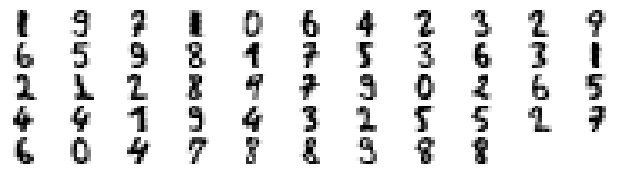

In [ ]:
plt.figure(figsize=(8,2))
for index, digit in enumerate(X_digits[closest_53_patterns]):
    plt.subplot(pat//10, 11, index+1)
    plt.imshow(digit.reshape(8,8), cmap='binary')
    plt.axis('off')

<AxesSubplot:>

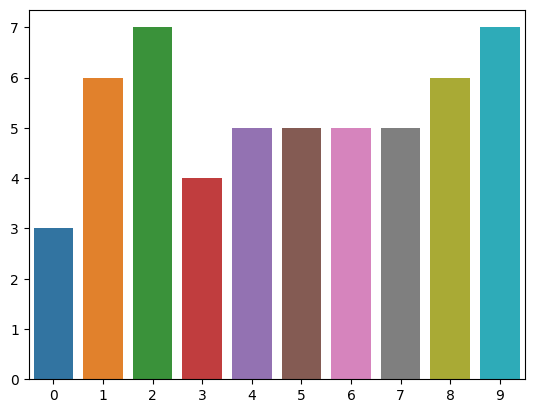

In [ ]:
x, f = np.unique(y_digits[closest_53_patterns], return_counts=True)
sns.barplot(x=x, y=f)

In [ ]:
# Define the model and its hyper-parameters
mlp_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
# Fit the model (train, learn) with 53 patterns
mlp_model.fit(X_digits[closest_53_patterns], y_digits[closest_53_patterns])

MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)

0.8046744574290484

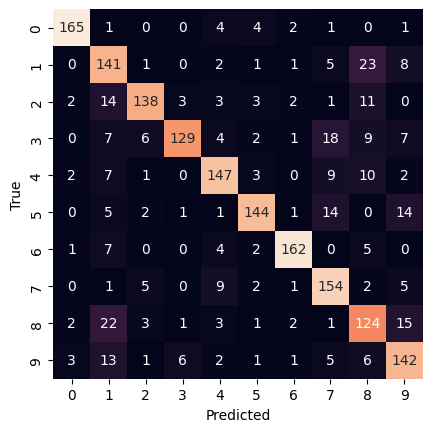

In [ ]:
# Predict for the whole dataset
y_pred = mlp_model.predict(X_digits)

# Evaluate on all dataset
cm = pd.DataFrame(confusion_matrix(y_digits, y_pred))
sns.heatmap(cm, square=True, cbar=False, fmt="d", annot=True)
plt.ylabel("True")
plt.xlabel("Predicted")
np.diag(cm).sum() / cm.sum().sum()

### Semi-supervised learning

![](https://blog.est.ai/assets/img/2020/1109/1.jpeg)

- Select a "small" subset to trian the model (53 instances)
- The subset is selected by random sampling and using an unsupervised model (KMeans)
- Using the labeled data (the subset of 53 instances) we train a MLP classifier
- Compared the performance for both subsets. 
- KMeans was better.
- **Why?**
  - KMeans finds more representative instances (observation)
  - Given that the instances were the closest observation to each centroid.
  - The centroid is a representative point that summarizes the characteristics of the group.
  - The best instances feed the supervised model.

- Conclusion: feeding the model with better data (not necessarily more) results in a better performance. 
  - Quality over Quantity.

### Homework

- Try more clusters
- As an excercise build a curve of n (sample size) vs accuracy of the model. 
  - That is compare Quantity ($x$) vs Quality ($y$).
  - Compare random vs KMeans for selecting the sample. 

  

![Picture title](image-20230531-201319.png)

### TO-DO Check: Sources and resources

- https://bdtechtalks.com/2021/01/04/semi-supervised-machine-learning/

- https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cce3455d-da08-4c10-a6fe-39f2a30c6a51' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>